In [ ]:
!pip install xgboost --upgrade
!pip install -U scikit-learn


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in data
df=pd.read_csv("/content/drive/MyDrive/Credit_Scoring/credit_risk_dataset.csv")
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
print(df['loan_intent'].unique())

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<ipython-input-7-4afd16476374>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, as_cmap=True, center = "dark"),


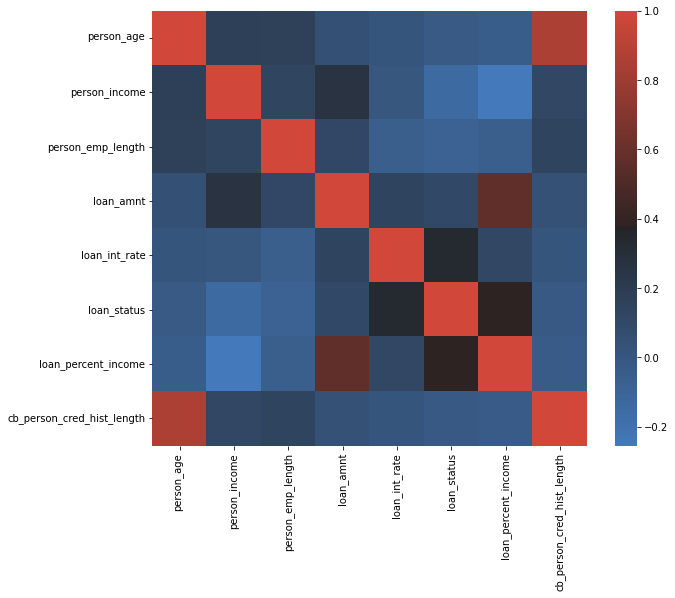

In [ ]:
#EDA
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, as_cmap=True, center = "dark"),
            square=True, ax=ax)

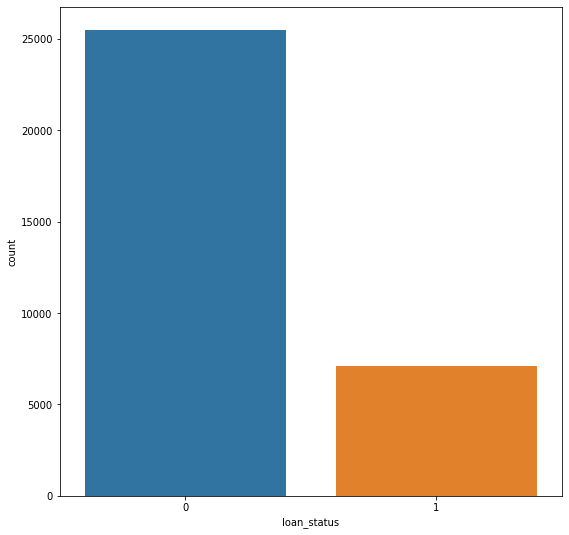

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(x=df["loan_status"])

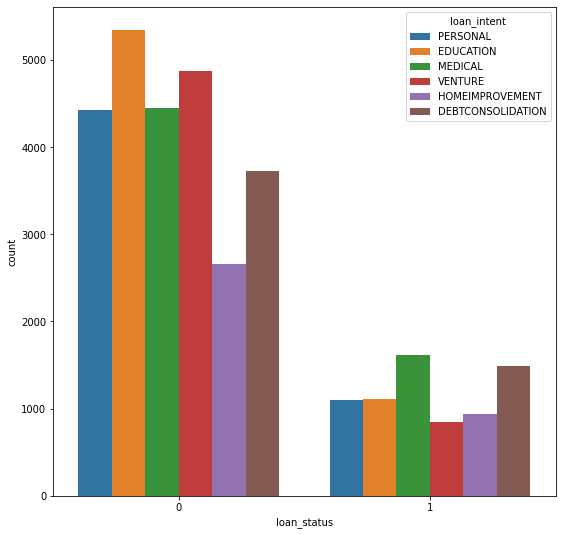

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(x=df["loan_status"], hue=df["loan_intent"])

In [ ]:
numerical_cols1 = [numname for numname in df.columns if df[numname].dtype in ['int64', 'float64']]
numerical_cols1.remove("loan_status")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

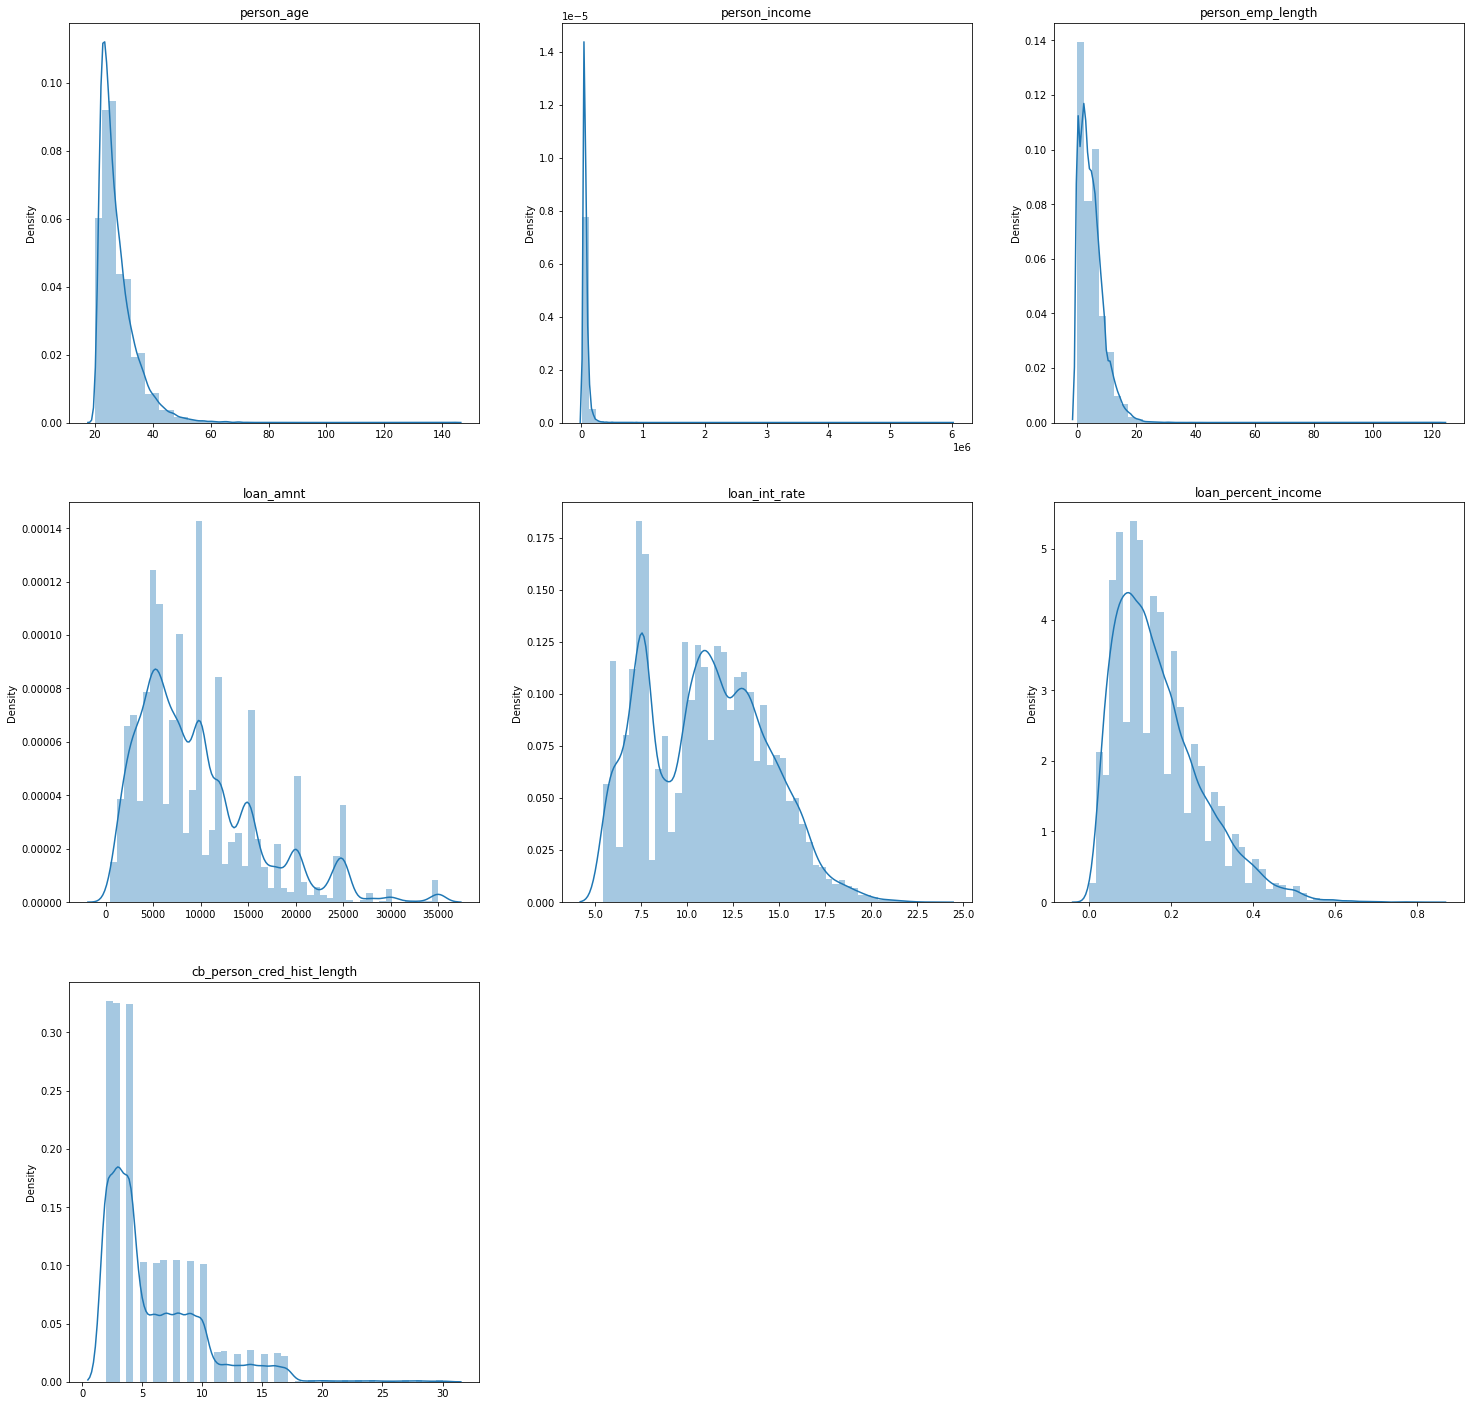

In [ ]:
plt.figure(figsize = (25, 25))
for i in enumerate(numerical_cols1):
    plt.subplot(3, 3,i[0]+1)
    #sns.countplot(i[1],data = df)
    sns.distplot(df, x = df[i[1]])
    plt.title(i[1])

In [ ]:
#Splitting Dataset
x = df.drop("loan_status", axis=1)
y = df.loan_status
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
X_train.isnull().sum()
x_test.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             188
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 629
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [ ]:
y_train.head(5)

18522    1
16475    0
24449    0
23843    0
27174    0
Name: loan_status, dtype: int64

In [ ]:
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()
discrete_features = x.dtypes == int

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)

In [ ]:
#preprocessing
numerical_transformer = SimpleImputer(strategy='constant')

categorical_cols = [catname for catname in X_train.columns if X_train[catname].nunique() < 10 and 
                        X_train[catname].dtype == "object"]

# Select numerical columns

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols1),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
#feature selection
from sklearn.feature_selection import SelectPercentile, chi2
selection = SelectPercentile(chi2, percentile= 80)

In [ ]:
#model
model  = XGBClassifier(learning_rate = 0.05)

In [ ]:
#pipeline

mypipeline = Pipeline(steps = [("preprocessor", preprocessor),
                               ("selection", selection),
                               ('model', model)
                              ])

In [ ]:
#crossvalidation and scoring
scores = cross_val_score(mypipeline, X_train, y_train,
                              cv=5,
                              scoring="accuracy")

print("MAE score:\n", scores.mean())

MAE score:
 0.926028190636815


In [ ]:
#Hyperoptimization
param_grid = {
    "model__learning_rate": np.arange(0.01,0.3,0.08),
    "model__max_depth":np.arange(1,10,1)
}

hyper = GridSearchCV(
    estimator = mypipeline,
    param_grid = param_grid ,
    scoring = "accuracy",
    verbose = 10,
    cv = 5)

hyper.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START model__learning_rate=0.01, model__max_depth=1..............
[CV 1/5; 1/36] END model__learning_rate=0.01, model__max_depth=1;, score=0.812 total time=   0.6s
[CV 2/5; 1/36] START model__learning_rate=0.01, model__max_depth=1..............
[CV 2/5; 1/36] END model__learning_rate=0.01, model__max_depth=1;, score=0.824 total time=   0.6s
[CV 3/5; 1/36] START model__learning_rate=0.01, model__max_depth=1..............
[CV 3/5; 1/36] END model__learning_rate=0.01, model__max_depth=1;, score=0.828 total time=   0.7s
[CV 4/5; 1/36] START model__learning_rate=0.01, model__max_depth=1..............
[CV 4/5; 1/36] END model__learning_rate=0.01, model__max_depth=1;, score=0.825 total time=   0.7s
[CV 5/5; 1/36] START model__learning_rate=0.01, model__max_depth=1..............
[CV 5/5; 1/36] END model__learning_rate=0.01, model__max_depth=1;, score=0.828 total time=   0.7s
[CV 1/5; 2/36] START model__learning_rate=0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='constant'),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'model__learning_rate': array([0.01, 0.09, 0.17, 0.25]),
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=10)

In [ ]:
print(hyper.best_score_)
print(hyper.best_estimator_)

0.9290975657261592
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                         

In [ ]:
predict = hyper.best_estimator_.predict(x_test)
test_score = accuracy_score(predict,y_test)
test_score*100

93.41721651066442

In [ ]:
import pickle

best_model = hyper.best_estimator_

# Save the model to a file
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

In [ ]:
# check XGBoost version
import xgboost
print(xgboost.__version__)


1.7.3
